# Test for exploring_filters2

here i follow the proccess of the last notebook but attempt to find a clearer representation

In [1]:
import numpy as np
import cmath
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#trusty waveGen
class waveGen:
	
	def __init__(self, freq, BufferSize, waveType, vol):
		
		self.sampleRate = 48000
		self.bufferSize = BufferSize
		self.buffer = np.empty(BufferSize, dtype=np.complex)
		self.frequency = freq
		self.omega = 0
		self.updateOmega()
		self.last = complex(1,0)
		self.type = waveType
		self.volume = vol

	def sineGen(self):

		#start = timer() #reduce function!!! functools
		for i in range(0, self.bufferSize):
			self.buffer[i] = self.last
			self.last=self.last*self.omega

		return self.volume * np.imag(self.buffer).astype(np.float32)

	def squareGen(self):
		#start = timer()
		for i in range(0, self.bufferSize):
			self.buffer[i] = np.sign(self.last)
			self.last=self.last*self.omega

		return np.real(self.volume * self.buffer).astype(np.float32)

	def updateOmega(self):
		self.omega = cmath.exp(1j*(2*cmath.pi * self.frequency / self.sampleRate))

	def updateFreq(self, val):
		self.frequency = val
		self.updateOmega()

	def nextFrame(self):
		if self.type == "sine":
			return self.sineGen()
		elif self.type == "square":
			return self.squareGen()
		elif self.type == "triangle":
			return self.triangleGen()

#### a script to build sines from 1 to 24000

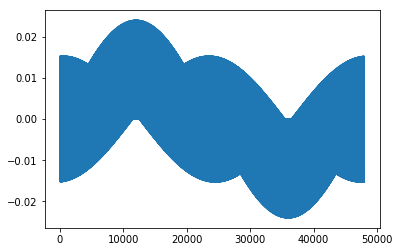

In [3]:

length = 48000
noise = np.zeros(length)
wave = waveGen(1, length, 'sine', .001)

for i in range(1, 24000, 1000):
    wave.updateFreq(i)
    noise += wave.nextFrame()

plt.plot(noise)
plt.show()
    
#---------------------------------------------------

freqSpec = np.fft.fft(noise)


## filtering from the last notebook:

In [4]:
#input
inpt_X = np.arctanh(noise)

#filter window in time domain
freq  = 10000
filt_freqDom = np.append(np.append(np.full(freq, 1), np.zeros(length-(freq*2))), np.full(freq, 1))
filt_H = np.fft.ifft(filt_freqDom)

#output
output_Y =  np.convolve(inpt_X, filt_H,)
output = np.tanh(output_Y)
#print(filt_H[:20])

/usr/lib64/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


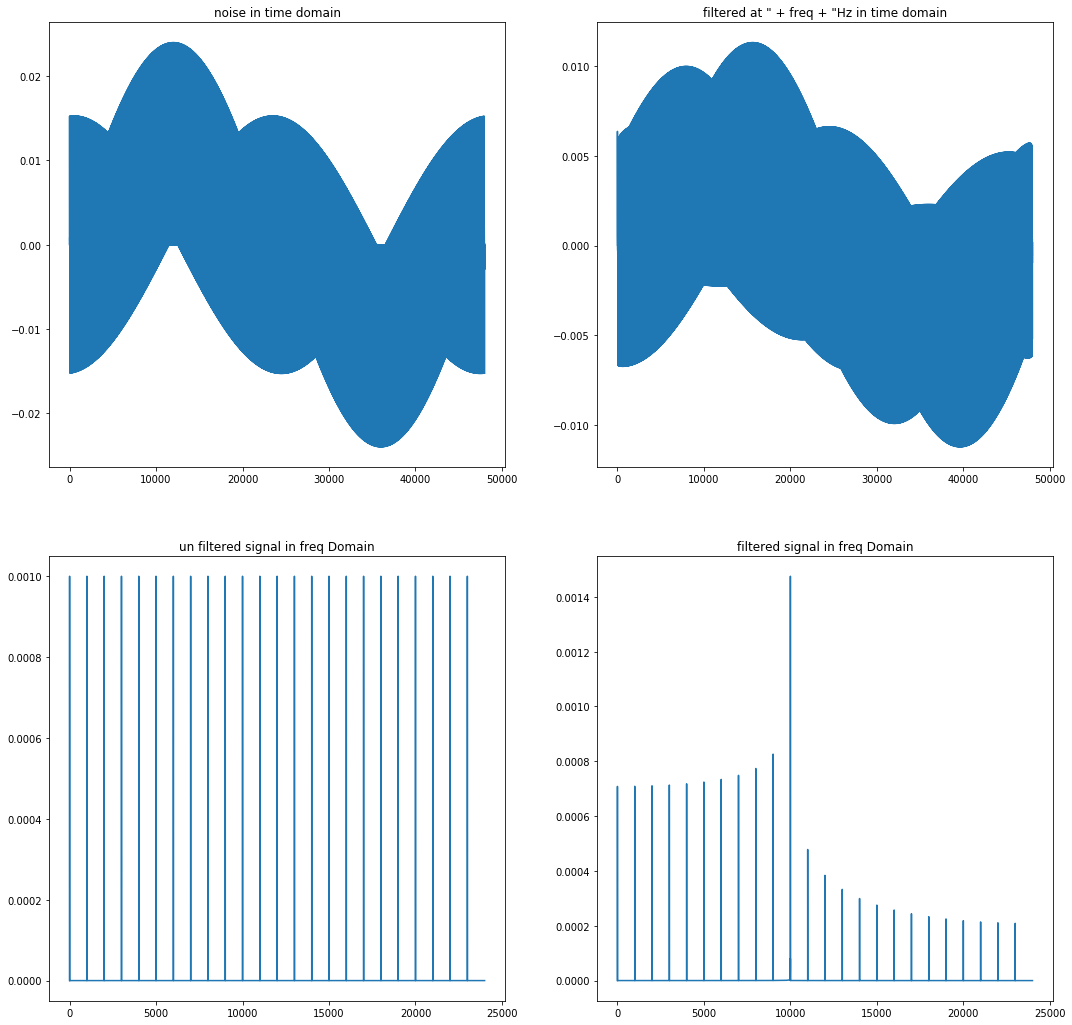

In [5]:
#plots
fig = plt.figure(figsize=(18, 18))

#time domain noise
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(noise)
ax1.set_title('noise in time domain')

#time domain filtered
ax1 = fig.add_subplot(2, 2, 2)
#cut output in half as it seems to double at some point
ax1.plot(output[:length])
ax1.set_title('filtered at " + freq + "Hz in time domain')



#-------------------------------------------------------------------------------------------

#linespaceing
T = 1.0 / length
#x angle of plot
xf = np.linspace(0.0, 1.0/(2.0*T), length//2)

#time domain filtered
ax1 = fig.add_subplot(2, 2, 3)
ax1.plot(xf, 2.0/length * np.abs(freqSpec[:length//2]))
ax1.set_title('un filtered signal in freq Domain')

#time domain filtered
output_in_freq_dom = np.fft.fft(output[:length])
ax1 = fig.add_subplot(2, 2, 4)
ax1.plot(xf, 2.0/length * np.abs(output_in_freq_dom[:length//2]))
ax1.set_title('filtered signal in freq Domain')

plt.show()

#### this has had an interesting effect

observations, 
    
    there is a hyawge resonent spike in the freq domain,
    
    the time domain looks fucked
    
    it doesnt filter as effectavly as one would hope above the cutoff
    
    

In [6]:
#now try on a square wave
wave = waveGen(220, length, 'square', .5)
square = wave.nextFrame()


#input
inpt_X = np.arctanh(square)

#filter window in time domain
freq  = 5000
filt_freqDom = np.append(np.append(np.full(freq, 1), np.zeros(length-(freq*2))), np.full(freq, 1))
filt_H = np.fft.ifft(filt_freqDom)

#output
output_Y =  np.convolve(inpt_X, filt_H)
output = np.tanh(output_Y)[:length]


/usr/lib64/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


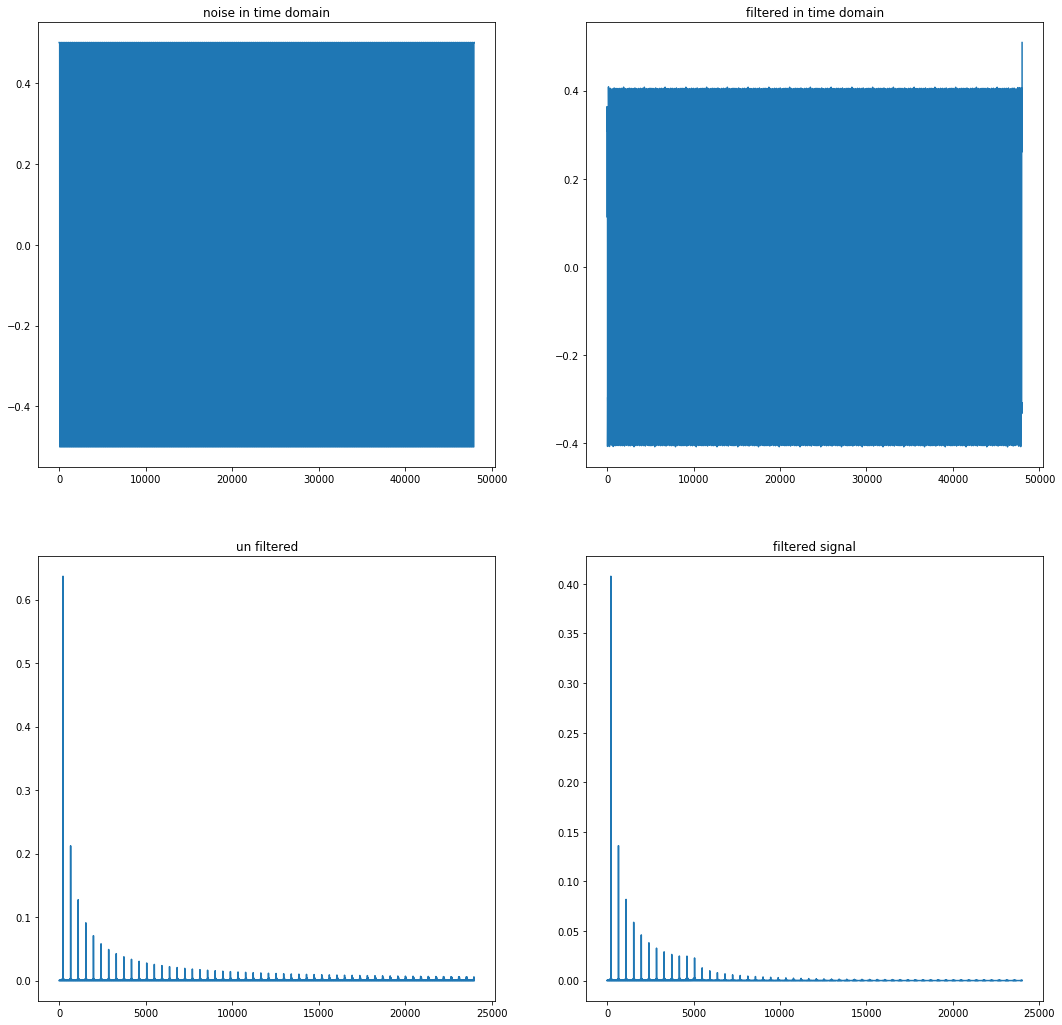

48000


In [7]:
#plots
fig = plt.figure(figsize=(18, 18))

#time domain noise
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(square)
ax1.set_title('noise in time domain')

#time domain filtered
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(output)
ax2.set_title('filtered in time domain')



#-------------------------------------------------------------------------------------------

#linespaceing
T = 1.0 / length
#x angle of plot
xf = np.linspace(0.0, 1.0/(2.0*T), length//2)

#time domain filtered
freqSpec = np.fft.fft(square)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(xf, 2.0/length * np.abs(freqSpec[:length//2]))
ax3.set_title('un filtered')

#time domain filtered
output_in_freq_dom = np.fft.fft(output)
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(xf, 2.0/length * np.abs(output_in_freq_dom[:length//2]))
ax4.set_title('filtered signal')

plt.show()

if len(output) != len(square):
    print("lengths are not matching")
    
print(len(output))

#### I want to take a better look at the filtered signal in the time domain

/usr/lib64/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[]

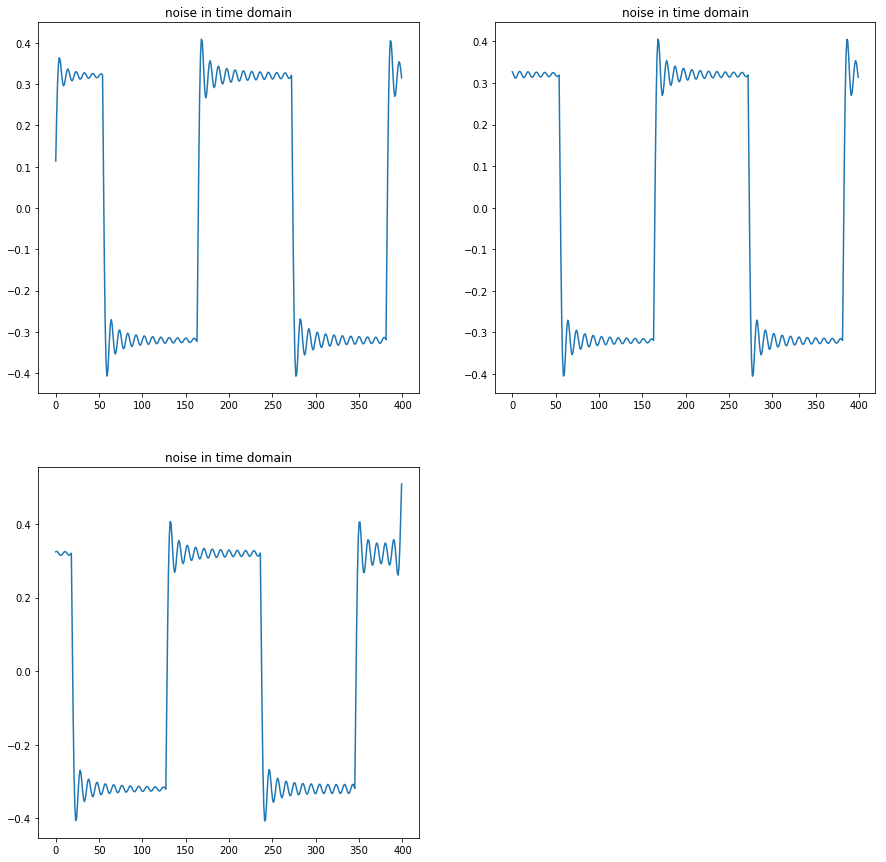

In [8]:
zoomTo = 400

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(output[:zoomTo])
ax1.set_title('noise in time domain')

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(output[length//2:length//2+zoomTo])
ax2.set_title('noise in time domain')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(output[length-zoomTo:])
ax3.set_title('noise in time domain')

plt.plot()

a weird leap can be seen here in ax3 at the end of the frame
I suspect that this might cause a problm in streaming

there is a simillar distortion at the begining of the frame in ax1

### More Obsavations
    
    there was an effect where by att some point the output had doubled in length.
    
    this is still an issue as i am cutting the array in half in order to display it

        incidently: the second half seems to be an exact reverse of the first half, with od bits in the middle
            im not sure if tis can be usefull
    
    this seems like a fairly good candidate for a filter to be used in over samlple
    
        testing would have to be done to ensure that this filter functions with <200 sample len frames
        
        the resonence that is shown in the first graph might not be desirable
        
        comparisons with the exponential mox_avv filter in exploring aliasing should be drawn
            idealy the responces would be exacly the same
    
    
    this proccess seems very slow
        
        many values may possibaly be cached in a filter object - leaving the archtanh() and conv()
            it may be posible to use the complex values given by the sine-genorator in place on the archtanh()
    
    
    I suspect that the convolution is happening from the back to front
        
        This means that it can quite possably be implemented from front to back in order to ease 
            in (delay on responce) into the begining of the stream and save last values
        